<font size='10'><h1 align="center"><font color='blue'>iPy oxDNA Examples</font></h1>

<center>
<img src="oxDNA.png">
</center>

# <font color='black'>Table of contents<font><a class='anchor' id='top'></a>
- [Build and Run a oxDNA Simulation](#1)
- [Run Multiple Simulations in Parallel](#2)
- [Umbrella Sampling](#3)

<font size='6'><a class="anchor" id="1"></a> <h2 align="center"> <font color='black'>Build and Run an oxDNA Simulation.</font></h2> 

<font size='3'><font color='black'>The Simulation class acts as an interface to an oxDNA simulation. </font>


In [1]:
from oxdna_simulation import Simulation
import os

<font size='3'><font color='black'>It takes the path to a directory containing inital dat and top files (file_dir) and the directory you want to run the simulation in (sim_dir) as its only arguments. </font>

In [2]:
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
sim_dir = f'{file_dir}/single_rro_sim_1'

sim = Simulation(file_dir, sim_dir)

<font size='3'><font color='black'>We can easily build a simulation that meets the minimum requirments to run a simulation using the build method.</font>

In [3]:
sim.build(clean_build='force')

<font size='3'><font color='black'>And then begin the simulation in a child subprocess using the oxpy_run.run method.</font>

In [4]:
sim.oxpy_run.run()

Running: single_rro_sim_1
Run time: 2.1730401776731014
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/single_rro_sim_1


<font size='3'><font color='black'> This will run an oxDNA simulation using default parameters for 1 billion steps at 20C.</font>

<div class="alert alert-block alert-info">
<b>Note:</b> We can terminate a simulation using the oxpy_run.process.terminate method.
</div>

In [5]:
sim.oxpy_run.process.terminate()

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


<font size='3'><font color='black'> To run a simulation with modified input parameters use the input_file file method</font>

In [6]:
#use a dictornary as the argument to input file
sim.input_file({'steps':'5e4', 'T':'30C', 'print_energy_every': '1e4',
                'print_conf_interval':'1e4'})

[All oxDNA input parameters can be found in the documentation here.](https://lorenzo-rovigatti.github.io/oxDNA/input.html)

<div class="alert alert-block alert-info">
<b>Note:</b> The smaller the print_conf_interval the slower the simulation will run.
</div>

<font size='3'><font color='black'> Rerun with modifed parameters.</font>
    
<div class="alert alert-block alert-danger">  
<b>Warning:</b> Rerunning by default will overwrite all previous output simulation files  
</div>

In [7]:
sim.oxpy_run.run()

Running: single_rro_sim_1
Run time: 15.704571595415473
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/single_rro_sim_1


<font size='3'><font color='black'>We can check in with our simulation while it runs using the analysis module.</font>

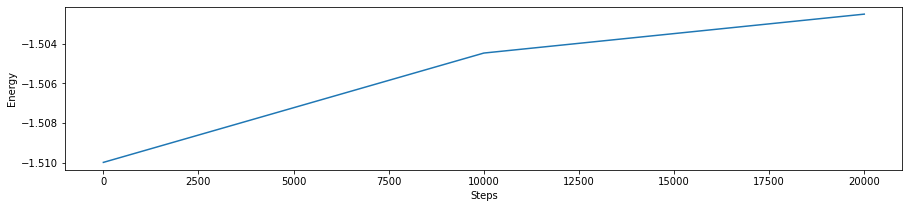

In [8]:
#A red line will be placed at the indicated number of steps in the input file
sim.analysis.plot_energy()

In [9]:
sim.analysis.view_last()

<font size='3'><font color='black'>To continue a previously run simulation for more steps without overriding previous files for a set amount of steps:</font>

In [10]:
sim.oxpy_run.process.terminate()

In [11]:
#sim = Simulation(file_dir, sim_dir)
sim.oxpy_run.run(continue_run=1e5)

Running: single_rro_sim_1


INFO: Lists updated 237 times (every ~210.970464 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 37.048 MB written to files
	372.000  B written to stdout/stderr
	For a total of     7.35 MB/s



<font size='3'><font color='black'>To add external forces or observables we can use the Force and Observable class with the add_force and add_observable methods.sim.oxpy_run.process.terminate()</font>

In [12]:
sim.oxpy_run.process.terminate()

In [14]:
from oxdna_simulation import Force, Observable
#The external forces will pull on the long edges of our rectangle to a distance of 30 sim untis.
com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'

f = Force()
com_force_1 = f.com_force(
    com_list=com_list,                        
    ref_list=ref_list,                        
    stiff='0.2',                        
    r0='30',                         
    PBC='1',                         
    rate='0'
)
com_force_2 = f.com_force(
    com_list=ref_list,                        
    ref_list=com_list,                        
    stiff='0.2',                        
    r0='30',                         
    PBC='1',                         
    rate='0'
)

#The observable will save the distance between the center of mass of
#the com_list and ref_list to a file named com_distance.txt every 1e5 steps.
obs = Observable()
com_distance = obs.distance(
    particle_1=com_list,
    particle_2=ref_list,
    print_every='1e3',
    name='com_distance.txt'
)

sim.build(clean_build=True)
sim.add_force(com_force_1)
sim.add_force(com_force_2)
sim.add_observable(com_distance)

Are you sure you want to delete all simulation files? Type y/yes to continue or anything else to return (use clean_build=str(force) to skip this message) y


In [15]:
sim.input_file({'steps':'1e7', 'print_conf_interval':'5e5'})
sim.oxpy_run.run()

Running: single_rro_sim_1
Run time: 306.19429120700806
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/single_rro_sim_1


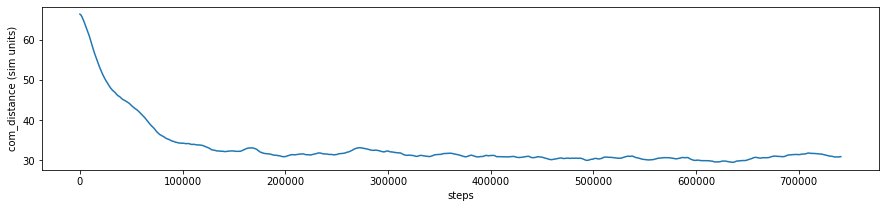

In [21]:
sim.analysis.plot_observable(com_distance)

In [20]:
sim.analysis.view_last()

In [22]:
sim.oxpy_run.process.terminate()

INFO: Lists updated 3591 times (every ~213.589808 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.118 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0957 MB/s



<font size='6'><a class="anchor" id="2"></a> <h2 align="center"> <font color='black'>Run Multiple Simulations in Parallel.</font></h2> 

<font size='3'><font color='black'>The SimulationManager class enable us to queue multiple simulations to be run in parallel. The simulation manager takes advantage of the nvidia-cuda-mps-server daemon to run multiple oxDNA simulation per GPU.</font>
    
<font size='3'><font color='black'>Each simulation will occupy a CPU core and a certain amount of GPU memory. You can run #cores - 1 simulations in parallel, unless GPU memory is near full. Simulation processes will be allocated to the GPU with the most avalible memory until all GPU memory is near full or #cores - 1 are being run. Once a simulation has finished, additional queued simulations will be allocated to be run. You can queue as many simulations as you desire.</font>

In [23]:
from oxdna_simulation import Simulation, SimulationManager
import os

<font size='3'><font color='black'>You can run multiple replicas of a single system with diffrent parameters. (i.e. temperatures)</font>

In [24]:
sim_manager = SimulationManager()
#sim_manager.start_nvidia_cuda_mps_control()
#sim_manager.reset_nvidia_cuda_mps_control()

path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
temperatures = ['20C', '25C', '30C']
sim_dir_list = [f'{file_dir}/rro_{temp}' for temp in temperatures]

sim_list = [Simulation(file_dir, sim_dir) for sim_dir in sim_dir_list]

sim_parameters = [{'T':temp, 'steps':'1e7'} for temp in temperatures]
for sim_parameters, sim in zip(sim_parameters, sim_list):
    sim.build(clean_build='force')
    sim.input_file(sim_parameters)
    sim_manager.queue_sim(sim)

In [25]:
sim_manager.run()

spawning
Running: rro_20C


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: rro_25C


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: rro_30C


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 148.42561065219343Run time: 144.10773386619985

Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_20CFinished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_30C

Run time: 146.27456643991172
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_25C


In [27]:
for sim in sim_list:
    sim.analysis.view_last()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [31]:
#currently does not work
sim_manager.terminate_all()

<font size='3'><font color='black'>Alternatively you can run multiple diffrent systems in parallel.</font>

In [32]:
sim_manager = SimulationManager()

path = os.path.abspath('../ipy_oxdna_examples')
systems = ['rro', 't9', 't20']

file_dir_list = [f'{path}/{sys}' for sys in systems]
sim_dir_list = [f'{file_dir}/{sys}_sys_example' for sys, file_dir in zip(systems, file_dir_list)]
sim_list = [Simulation(file_dir, sim_dir) for sim_dir, file_dir in zip(sim_dir_list, file_dir_list)]

sim_parameters = {'steps':'1e5', 'T':'20C', 'print_energy_every': '5e4', 'print_conf_interval':'5e4'}
for sim in sim_list:
    sim.build(clean_build='force')
    sim.input_file(sim_parameters)
    sim_manager.queue_sim(sim)

In [33]:
sim_manager.run()

spawning
Running: rro_sys_example


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: t9_sys_example


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.735 MB written to files
	 62.000  B written to stdout/stderr


Running: t20_sys_example


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.256 MB written to files
	 62.000  B written to stdout/stderr


Run time: 9.91879335604608
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_sys_example
Run time: 7.733310050331056
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/t9/t9_sys_example


INFO: Lists updated 296 times (every ~214.236486 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of     1.59 MB/s

INFO: Lists updated 286 times (every ~161.451049 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.735 MB written to files
	 62.000  B written to stdout/stderr
	For a total of    0.644 MB/s



Run time: 5.196031883358955
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/t20/t20_sys_example


Process Process-8:
Traceback (most recent call last):
  File "/packages/7x/jupyter/2022-04-15/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/packages/7x/jupyter/2022-04-15/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/scratch/mlsample/ipy_oxDNA/scr/oxdna_simulation.py", line 416, in worker_manager
    sleep(1)
KeyboardInterrupt
INFO: Lists updated 113 times (every ~157.592920 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  4.255 MB written to files
	 62.000  B written to stdout/stderr
	For a total of     1.54 MB/s



<font size='6'><a class="anchor" id="3"></a> <h2 align="center"> <font color='black'>Umbrella Sampling</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [34]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager

In [35]:
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
system = 'rro_umbrella_com_2'

com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'
xmin = 0
xmax = 72.787
n_windows = 100

stiff = 0.2


equlibration_parameters = {'steps':'1e6', 'T':'20C', 'print_energy_every': '1e6', 'print_conf_interval':'1e6'}
production_parameters = {'steps':'1e6', 'T':'20C', 'print_energy_every': '1e6', 'print_conf_interval':'1e6'}

us = ComUmbrellaSampling(file_dir, system)
simulation_manager = SimulationManager(n_processes=20)

In [36]:
us.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters, observable=True, print_every=1e4, name='com_distance.txt')

In [37]:
simulation_manager.run()

spawning
Running: 0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 566.1805841650348
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/4


INFO: Lists updated 4683 times (every ~213.538330 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0193 MB/s



Running: 20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 566.7423359239474
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/5


INFO: Lists updated 4678 times (every ~213.766567 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0193 MB/s



Running: 21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 568.0907273439225
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/12


INFO: Lists updated 4667 times (every ~214.270409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0192 MB/s



Running: 22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 570.857749606017
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/13


INFO: Lists updated 4704 times (every ~212.585034 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Running: 23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 629.1018655759981
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/0


INFO: Lists updated 4717 times (every ~211.999152 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0172 MB/s



Running: 24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 631.8339216420427
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/1


INFO: Lists updated 4654 times (every ~214.868930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0172 MB/s



Running: 25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 641.1076870049583
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/2


INFO: Lists updated 4625 times (every ~216.216216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Running: 26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 643.3311682329513
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/3


INFO: Lists updated 4665 times (every ~214.362272 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: 27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 638.7434247370111
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/8


INFO: Lists updated 4644 times (every ~215.331611 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Running: 28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 640.7009060659911
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/9


INFO: Lists updated 4654 times (every ~214.868930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Running: 29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 651.7677901289426
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/6


INFO: Lists updated 4746 times (every ~210.703751 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Run time: 650.4267424149439
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/7


INFO: Lists updated 4623 times (every ~216.309756 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 650.6761299490463
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/10


INFO: Lists updated 4637 times (every ~215.656675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 32


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 644.563489563996
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/16


INFO: Lists updated 4672 times (every ~214.041096 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Run time: 656.1771114439471
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/11


INFO: Lists updated 4739 times (every ~211.014982 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 644.1624901200412
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/17


INFO: Lists updated 4675 times (every ~213.903743 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 651.7761157019995
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/14


INFO: Lists updated 4726 times (every ~211.595430 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 35
Run time: 653.3111023869133
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 4675 times (every ~213.903743 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 649.6262143990025
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/18


INFO: Lists updated 4647 times (every ~215.192597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 649.6674022739753
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/19


INFO: Lists updated 4570 times (every ~218.818381 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 559.5912000130629
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/27


INFO: Lists updated 4670 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0193 MB/s



Running: 40


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 647.6334319000598
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/21


INFO: Lists updated 4680 times (every ~213.675214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Run time: 651.8868351270212
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/20


INFO: Lists updated 4692 times (every ~213.128730 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 41


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 42


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 563.9203628979158
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/31


INFO: Lists updated 4610 times (every ~216.919740 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0192 MB/s



Running: 43


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 558.5258100150386
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/33


INFO: Lists updated 4658 times (every ~214.684414 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0194 MB/s



Running: 44


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 645.43247758504
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/22


INFO: Lists updated 4749 times (every ~210.570646 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 45


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 562.5779505730607
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/36


INFO: Lists updated 4602 times (every ~217.296827 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0193 MB/s



Running: 46


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 651.5989016880048
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/23


INFO: Lists updated 4697 times (every ~212.901852 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 47


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 643.24547764007
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/25


INFO: Lists updated 4697 times (every ~212.901852 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 48


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 654.2991311789956
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/24


INFO: Lists updated 4634 times (every ~215.796288 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0164 MB/s



Running: 49


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 645.0199409599882
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/26


INFO: Lists updated 4646 times (every ~215.238915 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 50


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 643.0054504650179
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/29


INFO: Lists updated 4668 times (every ~214.224507 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 51


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 649.369993299013
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/28


INFO: Lists updated 4634 times (every ~215.796288 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 641.5849447000073
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/30


INFO: Lists updated 4584 times (every ~218.150087 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 52


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 53


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 646.9776248089038
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/32


INFO: Lists updated 4706 times (every ~212.494688 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 54


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 641.9872283040313
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/34


INFO: Lists updated 4735 times (every ~211.193242 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Run time: 641.4410975798965
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/35


INFO: Lists updated 4632 times (every ~215.889465 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 55


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 56


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 647.3288929730188
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/39


INFO: Lists updated 4614 times (every ~216.731686 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 652.2335112780565
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/37


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 651.0063771390123
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/38


INFO: Lists updated 4687 times (every ~213.356091 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 57


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 58


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 59


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 647.0001574601047
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/40


INFO: Lists updated 4664 times (every ~214.408233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 60


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 645.8518173439661
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/42


INFO: Lists updated 4660 times (every ~214.592275 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Run time: 649.0377963340143
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/41


INFO: Lists updated 4690 times (every ~213.219616 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 61


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 645.8162367240293
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/43


INFO: Lists updated 4714 times (every ~212.134069 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 62


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 63


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 560.0831402100157
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/54


INFO: Lists updated 4657 times (every ~214.730513 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0192 MB/s



Running: 64


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 647.7883744890569
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/44


INFO: Lists updated 4611 times (every ~216.872696 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 65


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 564.1909314569784
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/55


INFO: Lists updated 4586 times (every ~218.054950 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Run time: 649.872350767022
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/45


INFO: Lists updated 4706 times (every ~212.494688 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 66
Run time: 642.1204821930733
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/46


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr
INFO: Lists updated 4678 times (every ~213.766567 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 67


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 68


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 648.3007435760228
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/47


INFO: Lists updated 4635 times (every ~215.749730 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 69


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 562.945624437998
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/58


INFO: Lists updated 4678 times (every ~213.766567 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Running: 70


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 568.0144585290691
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/59


INFO: Lists updated 4658 times (every ~214.684414 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0189 MB/s



Running: 71


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 638.5916324430145
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/49


INFO: Lists updated 4644 times (every ~215.331611 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: 72


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 647.940825717058
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/48


INFO: Lists updated 4648 times (every ~215.146299 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 73


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 649.5022032429697
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/50


INFO: Lists updated 4701 times (every ~212.720698 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 74


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 641.6624623889802
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/51


INFO: Lists updated 4689 times (every ~213.265089 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Run time: 639.9385173689807
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/52


INFO: Lists updated 4669 times (every ~214.178625 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 75


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 640.8038240539609
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/53


INFO: Lists updated 4681 times (every ~213.629566 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: 76


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 77


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 637.3693099808879
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/56


INFO: Lists updated 4653 times (every ~214.915109 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: 78


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 636.3690236409893
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/57


INFO: Lists updated 4644 times (every ~215.331611 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: 79


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 550.1055589639582
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/73


INFO: Lists updated 4618 times (every ~216.543958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0195 MB/s



Running: 80


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 549.9210227809381
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/76


INFO: Lists updated 4699 times (every ~212.811236 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0195 MB/s



Run time: 548.7848451210884
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/77


INFO: Lists updated 4617 times (every ~216.590860 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0196 MB/s



Running: 81


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 82


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 645.4797854389763
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/60


INFO: Lists updated 4667 times (every ~214.270409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 83


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 547.8128525880165
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/78


INFO: Lists updated 4612 times (every ~216.825672 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0196 MB/s



Running: 84


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 646.2212449240033
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/63
Run time: 650.6343478099443
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/61


INFO: Lists updated 4603 times (every ~217.249620 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s

INFO: Lists updated 4682 times (every ~213.583938 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0164 MB/s



Run time: 649.1960918350378
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/62


INFO: Lists updated 4664 times (every ~214.408233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 549.4291891170433
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/79


INFO: Lists updated 4614 times (every ~216.731686 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0196 MB/s



Running: 85


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 646.4815999580314
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/64


INFO: Lists updated 4641 times (every ~215.470804 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 642.5376103910385
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/65
Running: 86


INFO: Lists updated 4657 times (every ~214.730513 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 87


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 88


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 89


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 647.2298624420073
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/66


INFO: Lists updated 4665 times (every ~214.362272 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 90


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 647.0856371939881
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/67


INFO: Lists updated 4763 times (every ~209.951711 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 646.0993300949922
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/68


INFO: Lists updated 4723 times (every ~211.729833 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 91


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 92


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 93


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 644.786214439082
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/69


INFO: Lists updated 4664 times (every ~214.408233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 94


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 645.2192569929175
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/70


INFO: Lists updated 4654 times (every ~214.868930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 95


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Run time: 643.7038124289829
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/71


INFO: Lists updated 4655 times (every ~214.822771 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: 96


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 645.0838407449191
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/72


INFO: Lists updated 4705 times (every ~212.539851 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: 97


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 648.9323377690744
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/74


INFO: Lists updated 4643 times (every ~215.377988 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0164 MB/s



Running: 98


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 649.7400764519116
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/75


INFO: Lists updated 4702 times (every ~212.675457 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0164 MB/s



Running: 99


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Run time: 557.6200925658923
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/87


INFO: Lists updated 4616 times (every ~216.637782 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0192 MB/s



Run time: 561.7838145429268
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/88


INFO: Lists updated 4647 times (every ~215.192597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0191 MB/s



Run time: 551.3780086969491
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/95


INFO: Lists updated 4685 times (every ~213.447172 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0195 MB/s



Run time: 628.0038231879007
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/80


INFO: Lists updated 4617 times (every ~216.590860 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s



Run time: 530.8527870419202
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/99


INFO: Lists updated 4710 times (every ~212.314225 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0202 MB/s



Run time: 629.1802166829584
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/81


INFO: Lists updated 4654 times (every ~214.868930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s



Run time: 628.7625272889854
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/82


INFO: Lists updated 4595 times (every ~217.627856 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Run time: 629.264770463109
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/83


INFO: Lists updated 4654 times (every ~214.868930 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s



Run time: 619.7053311880445
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/85


INFO: Lists updated 4756 times (every ~210.260723 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0172 MB/s



Run time: 636.8273631490301
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/84


INFO: Lists updated 4621 times (every ~216.403376 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Run time: 604.8737726899562
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/94


INFO: Lists updated 4578 times (every ~218.435998 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0176 MB/s



Run time: 633.2904856180539
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/90


INFO: Lists updated 4640 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Run time: 644.5405460440088
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/86


INFO: Lists updated 4634 times (every ~215.796288 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 633.1992705989396
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/93


INFO: Lists updated 4618 times (every ~216.543958 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Run time: 646.4626707800198
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/89


INFO: Lists updated 4633 times (every ~215.842866 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 647.2665017769905
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/91
Run time: 645.0636693250854
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/92


INFO: Lists updated 4719 times (every ~211.909303 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s

INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Run time: 624.462793751969
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/97


INFO: Lists updated 4659 times (every ~214.638334 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0171 MB/s



Run time: 636.8517521719914
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/96


INFO: Lists updated 4577 times (every ~218.483723 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Run time: 614.4620113549754
Finished: /scratch/mlsample/ipy_oxDNA/ipy_oxdna_examples/rro/rro_umbrella_com_2/equlibration/98
All queued simulations finished


INFO: Lists updated 4667 times (every ~214.270409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0173 MB/s

INFO: Lists updated 49459 times (every ~202.187671 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	138.100 MB written to files
	  1.271 KB written to stdout/stderr
	For a total of   0.0402 MB/s

INFO: Lists updated 48135 times (every ~207.749039 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	138.099 MB written to files
	  1.271 KB written to stdout/stderr
	For a total of   0.0394 MB/s

INFO: Lists updated 46372 times (every ~215.647373 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	138.137 MB written to files
	  1.271 KB written to stdout/stderr
	For a total of   0.0392 MB/s



In [3]:
us.build_production_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, production_parameters, observable=True, print_every=1e4, name='com_distance.txt')

In [4]:
simulation_manager.run()

spawning
Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/26


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/29


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/30


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/31


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/32


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/33


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/34


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/35


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/36


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/37


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/1
Simulation worker finished


INFO: Lists updated 4658 times (every ~214.684414 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0212 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/38


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/3
Simulation worker finished


INFO: Lists updated 4679 times (every ~213.720881 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0208 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/39


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/4
Simulation worker finished


INFO: Lists updated 4703 times (every ~212.630236 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0206 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/40


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/0
Simulation worker finished


INFO: Lists updated 4659 times (every ~214.638334 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0199 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/41


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/2
Simulation worker finished


INFO: Lists updated 4628 times (every ~216.076059 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0196 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/5
Simulation worker finished


INFO: Lists updated 4653 times (every ~214.915109 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0201 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/42


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/43


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/9
Simulation worker finished


INFO: Lists updated 4664 times (every ~214.408233 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0197 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/44


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/10
Simulation worker finished


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0193 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/45


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/6
Simulation worker finished


INFO: Lists updated 4692 times (every ~213.128730 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0187 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/46


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/7
Simulation worker finished


INFO: Lists updated 4661 times (every ~214.546235 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0185 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/47


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/14
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/8
Simulation worker finished


INFO: Lists updated 4617 times (every ~216.590860 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0188 MB/s

INFO: Lists updated 4645 times (every ~215.285253 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0183 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/48


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/15
Simulation worker finished


INFO: Lists updated 4603 times (every ~217.249620 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0188 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/49


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/11
Simulation worker finished


INFO: Lists updated 4679 times (every ~213.720881 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/50


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/16
Simulation worker finished


INFO: Lists updated 4640 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0186 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/51


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/52


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/17
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/12
Simulation worker finished


INFO: Lists updated 4647 times (every ~215.192597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0184 MB/s

INFO: Lists updated 4632 times (every ~215.889465 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/53


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/13
Simulation worker finished


INFO: Lists updated 4636 times (every ~215.703192 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.101 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/54


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/55


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/23
Simulation worker finished


INFO: Lists updated 4629 times (every ~216.029380 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0182 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/56


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/21
Simulation worker finished


INFO: Lists updated 4642 times (every ~215.424386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/57


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/24
Simulation worker finished


INFO: Lists updated 4598 times (every ~217.485863 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0182 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/58


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/25
Simulation worker finished


INFO: Lists updated 4651 times (every ~215.007525 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/18
Simulation worker finished


INFO: Lists updated 4615 times (every ~216.684724 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0172 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/59


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/19
Simulation worker finished


INFO: Lists updated 4683 times (every ~213.538330 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0171 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/60


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/61


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/31
Simulation worker finished


INFO: Lists updated 4651 times (every ~215.007525 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0181 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/62


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/30
Simulation worker finished


INFO: Lists updated 4676 times (every ~213.857998 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/32
Simulation worker finished


INFO: Lists updated 4579 times (every ~218.388294 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.018 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/63


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/64


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/20
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/22
Simulation worker finished


INFO: Lists updated 4585 times (every ~218.102508 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.017 MB/s

INFO: Lists updated 4671 times (every ~214.086919 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0169 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/33
Simulation worker finished


INFO: Lists updated 4640 times (every ~215.517241 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/65


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/66


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/67


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/26
Simulation worker finished


INFO: Lists updated 4600 times (every ~217.391304 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.101 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/68


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/27
Simulation worker finished


INFO: Lists updated 4756 times (every ~210.260723 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/69


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/28
Simulation worker finished


INFO: Lists updated 4624 times (every ~216.262976 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/29
Simulation worker finished


INFO: Lists updated 4589 times (every ~217.912399 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/70


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/71


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/34
Simulation worker finished


INFO: Lists updated 4719 times (every ~211.909303 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/36
Simulation worker finished


INFO: Lists updated 4629 times (every ~216.029380 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/35
Simulation worker finished


INFO: Lists updated 4710 times (every ~212.314225 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/72


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/37
Simulation worker finished


INFO: Lists updated 4610 times (every ~216.919740 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/73


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/74


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/75


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/42
Simulation worker finished


INFO: Lists updated 4621 times (every ~216.403376 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/38
Simulation worker finished


INFO: Lists updated 4626 times (every ~216.169477 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/76


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/39
Simulation worker finished


INFO: Lists updated 4778 times (every ~209.292591 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/77


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/78


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/40
Simulation worker finished


INFO: Lists updated 4692 times (every ~213.128730 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/79


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/45
Simulation worker finished


INFO: Lists updated 4559 times (every ~219.346348 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/80


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/41
Simulation worker finished


INFO: Lists updated 4698 times (every ~212.856535 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0165 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/81


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/43
Simulation worker finished


INFO: Lists updated 4685 times (every ~213.447172 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/82


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/48
Simulation worker finished


INFO: Lists updated 4652 times (every ~214.961307 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/44
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/49
Simulation worker finished


INFO: Lists updated 4691 times (every ~213.174163 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s

INFO: Lists updated 4656 times (every ~214.776632 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/83


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/51
Simulation worker finished


INFO: Lists updated 4630 times (every ~215.982721 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/84


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/85


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/86


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/46
Simulation worker finished


INFO: Lists updated 4709 times (every ~212.359312 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/47
Simulation worker finished


INFO: Lists updated 4655 times (every ~214.822771 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/53
Simulation worker finished


INFO: Lists updated 4669 times (every ~214.178625 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/87


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.367 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/54


INFO: Lists updated 4601 times (every ~217.344056 steps)


Simulation worker finished


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/88


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/55
Simulation worker finished


INFO: Lists updated 4611 times (every ~216.872696 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/89


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/90


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/91


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/50
Simulation worker finished


INFO: Lists updated 4659 times (every ~214.638334 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/52
Simulation worker finished


INFO: Lists updated 4644 times (every ~215.331611 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/92


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/93


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/62
Simulation worker finished


INFO: Lists updated 4634 times (every ~215.796288 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/94


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/56
Simulation worker finished


INFO: Lists updated 4642 times (every ~215.424386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/95


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/57


INFO: Lists updated 4692 times (every ~213.128730 steps)


Simulation worker finished


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/65
Simulation worker finished


INFO: Lists updated 4670 times (every ~214.132762 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s

INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/96
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/58
Simulation worker finished


INFO: Lists updated 4668 times (every ~214.224507 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.114 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/59
Simulation worker finished


INFO: Lists updated 4619 times (every ~216.497077 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/60
Simulation worker finished


INFO: Lists updated 4628 times (every ~216.076059 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/97


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/98


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.370 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/68
Simulation worker finished


INFO: Lists updated 4646 times (every ~215.238915 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Running: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/99


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/61
Simulation worker finished


INFO: Lists updated 4702 times (every ~212.675457 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.110 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0166 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/69
Simulation worker finished


INFO: Lists updated 4620 times (every ~216.450216 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0177 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/64
Simulation worker finished


INFO: Lists updated 4611 times (every ~216.872696 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/63
Simulation worker finished


INFO: Lists updated 4688 times (every ~213.310580 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0168 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/70
Simulation worker finished


INFO: Lists updated 4637 times (every ~215.656675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.104 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/71
Simulation worker finished


INFO: Lists updated 4647 times (every ~215.192597 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/73
Simulation worker finished
Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/72
Simulation worker finished


INFO: Lists updated 4543 times (every ~220.118864 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s

INFO: Lists updated 4637 times (every ~215.656675 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/66
Simulation worker finished


INFO: Lists updated 4716 times (every ~212.044105 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/67
Simulation worker finished


INFO: Lists updated 4648 times (every ~215.146299 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0167 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/74
Simulation worker finished


INFO: Lists updated 4663 times (every ~214.454214 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0178 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/75
Simulation worker finished


INFO: Lists updated 4603 times (every ~217.249620 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0179 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/77
Simulation worker finished


INFO: Lists updated 4589 times (every ~217.912399 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0243 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/76
Simulation worker finished


INFO: Lists updated 4668 times (every ~214.224507 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0242 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/84
Simulation worker finished


INFO: Lists updated 4642 times (every ~215.424386 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0262 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/80
Simulation worker finished


INFO: Lists updated 4697 times (every ~212.901852 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0245 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/87
Simulation worker finished


INFO: Lists updated 4667 times (every ~214.270409 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0269 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/81
Simulation worker finished


INFO: Lists updated 4652 times (every ~214.961307 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0248 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/91
Simulation worker finished


INFO: Lists updated 4608 times (every ~217.013889 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.103 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0282 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/88
Simulation worker finished


INFO: Lists updated 4721 times (every ~211.819530 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0268 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/78
Simulation worker finished


INFO: Lists updated 4646 times (every ~215.238915 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0224 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/90
Simulation worker finished


INFO: Lists updated 4671 times (every ~214.086919 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.109 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0269 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/89
Simulation worker finished


INFO: Lists updated 4674 times (every ~213.949508 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0268 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/82
Simulation worker finished


INFO: Lists updated 4633 times (every ~215.842866 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0229 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/83
Simulation worker finished


INFO: Lists updated 4630 times (every ~215.982721 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0232 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/92
Simulation worker finished


INFO: Lists updated 4552 times (every ~219.683656 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.107 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0248 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/94
Simulation worker finished


INFO: Lists updated 4572 times (every ~218.722660 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.102 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.026 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/97
Simulation worker finished


INFO: Lists updated 4588 times (every ~217.959895 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0271 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/79
Simulation worker finished


INFO: Lists updated 4555 times (every ~219.538968 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0192 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/85
Simulation worker finished


INFO: Lists updated 4639 times (every ~215.563699 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0194 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/86
Simulation worker finished


INFO: Lists updated 4703 times (every ~212.630236 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.105 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0194 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/93
Simulation worker finished


INFO: Lists updated 4685 times (every ~213.447172 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0199 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/95
Simulation worker finished


INFO: Lists updated 4578 times (every ~218.435998 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.108 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0205 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/96
Simulation worker finished


INFO: Lists updated 4643 times (every ~215.377988 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0208 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/98
Simulation worker finished


INFO: Lists updated 4610 times (every ~216.919740 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.111 MB written to files
	124.000  B written to stdout/stderr
	For a total of    0.021 MB/s



Finished: //scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example/rro/rro_umbrella_com_2/production/99
Simulation worker finished


INFO: Lists updated 4629 times (every ~216.029380 steps)
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	 10.106 MB written to files
	124.000  B written to stdout/stderr
	For a total of   0.0211 MB/s



All queued simulations finished


In [10]:
wham_dir = '//scratch/matthew/automate/ipy_oxDNA/rewrite/wham/wham/'
n_bins = '200'
tol = '1e-5'
n_boot = '30'
us.wham_job(wham_dir, xmin, xmax, stiff, n_bins, tol, n_boot)

Running WHAM analysis...
WHAM analysis completed


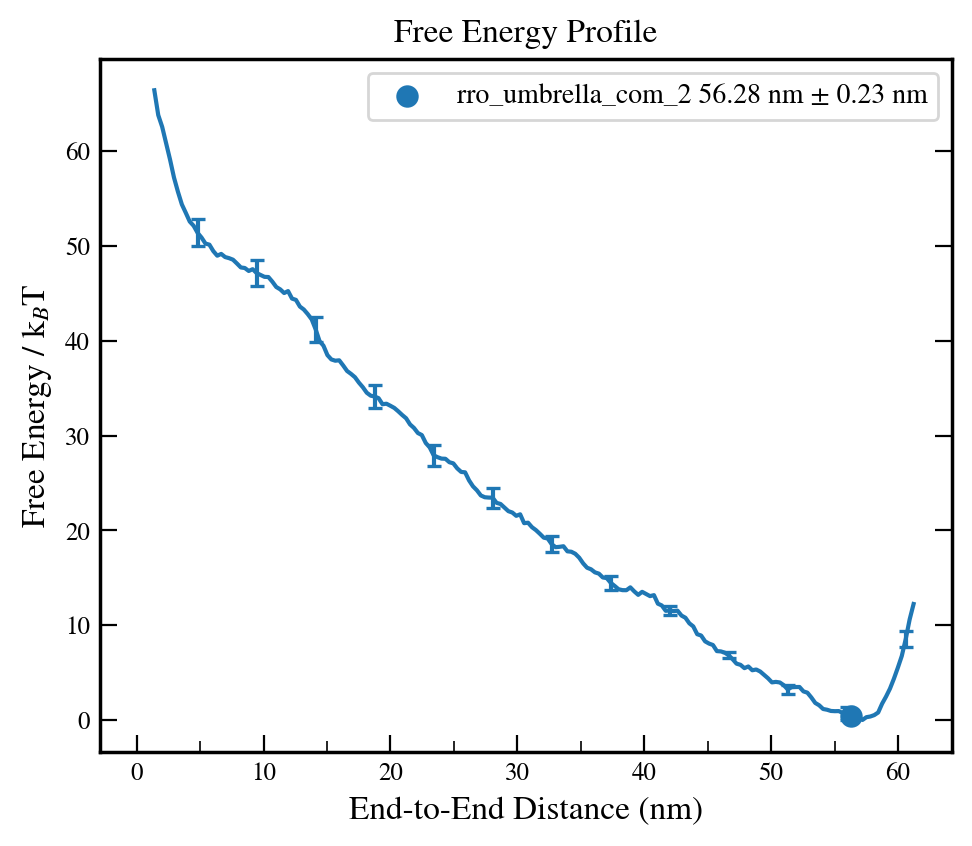

In [11]:
us.plot_free()

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

with open('mprofile_20230127194259.dat', 'r') as f:
    lines = f.readlines()

lines = lines[1:]    
lines_mem = [l.lstrip('MEM ').strip('\n').split() for l in lines if l.startswith('MEM')]
lines_chld = [l.lstrip('CHLD').strip('\n').split() for l in lines if l.startswith('CHLD')]

lines_mem = list(map(list, zip(*lines_mem)))
lines_chld = list(map(list, zip(*lines_chld)))

plt.figure(dpi=300)
plt.plot(np.array(lines_chld[0], dtype=np.float32), np.array(lines_chld[1], dtype=np.float32))
#print(lines_mem[0])




FileNotFoundError: [Errno 2] No such file or directory: 'mprofile_20230127194259.dat'

<font size='6'><a class="anchor" id="4"></a> <h2 align="center"> <font color='black'>Multiple Umbrella Sampling Systems</font></h2> 

<font size='3'><font color='black'>Utilizing the ComUmbrellaSampling class, we can automatically run 1D umbrella sampling simulations with a COM order parameter.</font>

In [9]:
simulation_manager = SimulationManager()
simulation_manager.restart_nvidia_cuda_mps_control()

In [8]:
from umbrella_sampling import ComUmbrellaSampling
from oxdna_simulation import SimulationManager
import os
import multiprocessing as mp
#%load_ext memory_profiler


In [10]:
#mp.set_start_method('spawn')
path = os.path.abspath('../ipy_oxdna_examples')
file_dir = f'{path}/rro'
system = [f'rro_umbrella_benchmarking_{sys}' for sys in range(5)]

com_list = '63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829'
ref_list = '3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446'

stiff = 0.2
xmin = 0
xmax = 72.787
n_windows = 100

equlibration_parameters = [{'steps':'8e5', 'print_energy_every': '8e5', 'print_conf_interval':'8e5', 'max_density_multiplier':'2'},
                           {'steps':'3e5',  'print_energy_every': '3e5', 'print_conf_interval':'3e5','fix_diffusion':'0'}
                          ]
production_parameters = [{'steps':'1e6', 'print_energy_every': '1e6', 'print_conf_interval':'1e6'} for _ in range(3)]


us_0 = ComUmbrellaSampling(file_dir, system[0])
# us_1 = ComUmbrellaSampling(file_dir, system[1])
# us_2 = ComUmbrellaSampling(file_dir, system[2])
# us_3 = ComUmbrellaSampling(file_dir, system[3])
# us_4 = ComUmbrellaSampling(file_dir, system[4])
#us_6 = ComUmbrellaSampling(file_dir, system[5])



simulation_manager = SimulationManager()

In [11]:
us_0.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=True, print_every=1e4, name='com_distance.txt')
# us_1.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=False, print_every=1e4, name='com_distance.txt')
# us_2.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[1], observable=True, print_every=1e4, name='com_distance.txt')
# us_3.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[1], observable=False, print_every=1e4, name='com_distance.txt')
# us_4.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=True, print_every=1e3, name='com_distance.txt')
# #us_5.build_equlibration_runs(simulation_manager, n_windows, com_list, ref_list, stiff, xmin, xmax, equlibration_parameters[0], observable=True, print_every=1e4, name='com_distance.txt')


In [12]:
simulation_manager.worker_manager()

Running: 0


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 1


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 2


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 3


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 4


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 5


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 6


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 7


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 8


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 9


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 10


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 11


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 12


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 13


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 14


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 15


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 16


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 17


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 18


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 19


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 20


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 21


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 22


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.368 MB written to files
	 62.000  B written to stdout/stderr


Running: 23


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 24


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 25


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr
INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 26
Running: 27


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


Running: 28


INFO: Aggregated I/O statistics (set debug=1 for file-wise information)
	  3.369 MB written to files
	 62.000  B written to stdout/stderr


OSError: [Errno 12] Cannot allocate memory

In [9]:
print(simulation_manager.manager_process.terminate())

None


In [8]:
import resource
print(resource.getrlimit(resource.RLIMIT_DATA)) # => (soft_lim, hard_lim))
print(resource.getrlimit(resource.RLIMIT_AS))

(-1, -1)
(-1, -1)


In [2]:
import psutil

for proc in psutil.process_iter():
    if 'jupyter-lab' in proc.name():
        print(proc.pid)

107108


In [3]:
pip install pympler

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 164 kB 3.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
print(soft, hard)

32768 131072


In [1]:
from resource import *
import time

# a non CPU-bound task
time.sleep(3)
print(getrusage(RUSAGE_SELF))

# a CPU-bound task
for i in range(10 ** 8):
   _ = 1 + 1
print(getrusage(RUSAGE_SELF))

0
0


In [8]:
import subprocess as sp
import numpy as np
def gpu_resources():
    output_to_list = lambda x: x.decode('ascii').split('\n')[:-1]
    ACCEPTABLE_AVAILABLE_MEMORY = 1024
    COMMAND = "nvidia-smi --query-gpu=memory.free --format=csv"
    try:
        memory_free_info = output_to_list(sp.check_output(COMMAND,stderr=sp.STDOUT, shell=True))[1:]
    except sp.CalledProcessError as e:
        raise RuntimeError("command '{}' return with error (code {}): {}".format(e.cmd, e.returncode, e.output))
    print(memory_free_info)
    avalible_memory = [int(x.split()[0]) for i, x in enumerate(memory_free_info)]
    # print(memory_use_values)
    gpu_most_aval_mem_free = max(avalible_memory)
    gpu_most_aval_mem_free_idx = avalible_memory.index(gpu_most_aval_mem_free)
    return np.round(gpu_most_aval_mem_free, 2), gpu_most_aval_mem_free
gpu_resources()

['16130 MiB', '16130 MiB', '16130 MiB', '16130 MiB']


(16130, 16130)

In [13]:
us_0.equlibration_sims[27].analysis.view_last()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
#Nucleotide indexes used to represent first component of your order parameter
#comma separated list of indexes can be obtained using the selection function on oxView
com_list = ['63,157,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,6830,6736,6737,6738,6739,6740,6741,6742,6743,6744,6745,6746,6747,6748,6749,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829',
            '175,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,6847,6754,6755,6756,6757,6758,6759,6760,6761,6762,6763,6764,6765,6766,6767,6768,6769,6770,6771,6772,6773,6774,6775,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6753',
            '103,197,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,6870,6776,6777,6778,6779,6780,6781,6782,6783,6784,6785,6786,6787,6788,6789,6790,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830,6831,6832,6833,6834,6835,6836,6837,6838,6839,6840,6841,6842,6843,6844,6845,6846,6847,6848,6849,6850,6851,6852,6853,6854,6855,6856,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867,6868,6869'
           ]
#Nucleotide indexes used to represent second component of your order parameter
ref_list = ['3455,3510,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3447,3448,3449,3450,3451,3452,3453,3454,3541,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3352,3353,3354,3355,3356,3357,3358,3359,3360,3361,3362,3363,3364,3365,3366,3367,3368,3369,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446',
            '3472,3370,3371,3372,3373,3374,3375,3376,3377,3378,3379,3380,3381,3382,3383,3384,3385,3386,3387,3388,3389,3390,3391,3392,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3473,3557,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3558,3559',
            '3392,3580,3393,3394,3395,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3459,3460,3461,3462,3463,3464,3465,3466,3467,3468,3469,3470,3471,3472,3473,3474,3475,3476,3477,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3495,3496,3497,3498,3499,3500,3501,3502,3503,3504,3505,3506,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3581'
           ]

stiff = [0.2, 0.2, 0.2]
xmin = [0, 0, 0]
xmax = [72, 72, 72]
n_windows = [100, 100, 100]
equlibration_parameters = [{'steps':'2e4'}, {'steps':'2e4'}, {'steps':'2e4'}]

path = '//scratch/matthew/automate/ipy_oxDNA/umbrella_sampling_example'
file_dir = [f'{path}/rro', f'{path}/t9', f'{path}/t20']
system = ['rro_umbrella' 't9_umbrella', 't20_umbrella']

umbrella_objects = {}
for files, sys in zip(file_dir, system):
    umbrella_objects[sys] = BaseUmbrellaSampling(files, sys)

In [9]:
import subprocess as sp

def get_gpu_memory():
    output_to_list = lambda x: x.decode('ascii').split('\n')[:-1]
    ACCEPTABLE_AVAILABLE_MEMORY = 1024
    COMMAND = "nvidia-smi --query-gpu=memory.free --format=csv"
    try:
        memory_use_info = output_to_list(sp.check_output(COMMAND.split(),stderr=sp.STDOUT))[1:]
    except sp.CalledProcessError as e:
        raise RuntimeError("command '{}' return with error (code {}): {}".format(e.cmd, e.returncode, e.output))
    memory_use_values = [int(x.split()[0]) for i, x in enumerate(memory_use_info)]
    # print(memory_use_values)
    return memory_use_values
get_gpu_memory()

[16130, 16130, 16130, 16130]

In [5]:
import nvsmi

In [8]:
def gpu_resources():
    gpus_mem_free = [gpu.mem_free for gpu in nvsmi.get_gpus()]
    gpu_most_aval_mem_free = max(gpus_mem_free)
    gpu_most_aval_mem_free_idx = gpus_mem_free.index(gpu_most_aval_mem_free)
    return gpu_most_aval_mem_free, gpu_most_aval_mem_free_idx
gpu_resources()

NameError: name 'nvsmi' is not defined

In [14]:
gpus[0].mem_free

81039.0

In [7]:
import nvidia_smi
import numpy as np

def _bytes_to_megabytes(byte):
    return byte/1048576

def gpu_resources():
    """ Method to probe the number and current avalible memory of gpus."""
    avalible_memory = []
    nvidia_smi.nvmlInit()
    NUMBER_OF_GPU = nvidia_smi.nvmlDeviceGetCount()
    for i in range(NUMBER_OF_GPU):
        handle = nvidia_smi.nvmlDeviceGetHandleByIndex(i)
        info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
        avalible_memory.append(_bytes_to_megabytes(info.total) -  _bytes_to_megabytes(info.used))
    gpu_most_aval_mem_free = max(avalible_memory)
    gpu_most_aval_mem_free_idx = avalible_memory.index(gpu_most_aval_mem_free)
    return np.round(gpu_most_aval_mem_free, 2), gpu_most_aval_mem_free_idx
gpu_resources()



(64174.31, 1)

In [15]:
import subprocess as sp
import gc
def gpu_resources():
    output_to_list = lambda x: x.decode('ascii').split('\n')[:-1]
    ACCEPTABLE_AVAILABLE_MEMORY = 1024
    COMMAND = "nvidia-smi --query-gpu=memory.free --format=csv"
    try:
        memory_free_info = output_to_list(sp.check_output(COMMAND.split(),stderr=sp.STDOUT))[1:]
    except sp.CalledProcessError as e:
        raise RuntimeError("command '{}' return with error (code {}): {}".format(e.cmd, e.returncode, e.output))
    avalible_memory = [int(x.split()[0]) for i, x in enumerate(memory_free_info)]
    # print(memory_use_values)
    gpu_most_aval_mem_free = max(avalible_memory)
    gpu_most_aval_mem_free_idx = avalible_memory.index(gpu_most_aval_mem_free)
    return np.round(gpu_most_aval_mem_free, 2), gpu_most_aval_mem_free

gpu_resources()

OSError: [Errno 12] Cannot allocate memory

In [17]:
import multiprocessing as mp
mp.set_start_method('spawn')
p = mp.Process(target=gpu_resources, args=())
p.start()

RuntimeError: context has already been set

In [12]:
import os
import multiprocessing as mp

COMMAND = "nvidia-smi --query-gpu=memory.free --format=csv"
x = os.system(COMMAND)

print(x)

-1


In [13]:
!nvidia-smi

OSError: [Errno 12] Cannot allocate memory

In [14]:
!swapon -s

OSError: [Errno 12] Cannot allocate memory